# Import relevant packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_theme()

# Import and Explore Data

In [3]:
raw_df = pd.read_csv('C:/Users/jacev/Desktop/Portfolio/Movie_data/movies.csv')
raw_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
raw_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df = raw_df.copy()
print('Feature and Missing Values Count')

for col_name in df.columns:
    if df[col_name].isnull().any() ==True:
        prct = str(round(np.mean(df[col_name].isnull()),2)*100)
        print(col_name+':', sum(df[col_name].isnull()), f'of {df.shape[0]};' , \
            prct[:prct.find('.')] +"%")

Feature and Missing Values Count
rating: 77 of 7668; 1%
released: 2 of 7668; 0%
score: 3 of 7668; 0%
votes: 3 of 7668; 0%
writer: 3 of 7668; 0%
star: 1 of 7668; 0%
country: 3 of 7668; 0%
budget: 2171 of 7668; 28%
gross: 189 of 7668; 2%
company: 17 of 7668; 0%
runtime: 4 of 7668; 0%


In [7]:
#Any column with less than 5% of missing values, will have all rows with null values removed
for col in df.columns:
    if 0 < np.mean(df[col].isnull()) < .05:
        missing_indices = df.index[df[col].isnull()]
        df.drop(missing_indices, axis= 0, inplace= True)
        df.reset_index(drop= True, inplace= True)

print('After removing miscellaneous null values: \n' \
    'We still have',str(int((df.shape[0] / raw_df.shape[0])*100))+'%', 'of our original data')


After removing miscellaneous null values: 
We still have 96% of our original data


In [8]:
#Now only budget has missing values
print('Feature and Missing Values Count')
for col_name in df.columns:
    if df[col_name].isnull().any() ==True:
        prct = str(round(np.mean(df[col_name].isnull()),2)*100)
        print(col_name+':', sum(df[col_name].isnull()), f'of {df.shape[0]};' , \
            prct[:prct.find('.')] +"%")

Feature and Missing Values Count
budget: 1991 of 7412; 27%


# Exploring 3 different Budgets
1. with null values
2. zero values
3. mean value

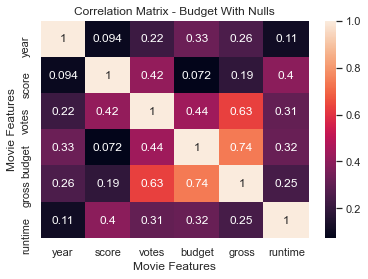

In [11]:
#heatmap leaving budget with null values

sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix - Budget With Nulls")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
#plt.savefig('Null_Heatmap.jpg')
plt.show()


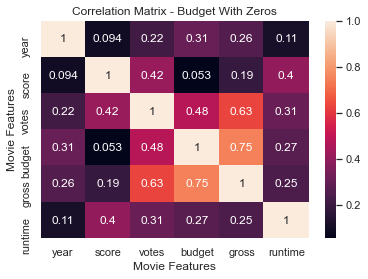

In [12]:
#heatmap replacing null values with zero
zero_df = df.copy()
zero_df = zero_df.fillna(0)

sns.heatmap(zero_df.corr(), annot= True)
plt.title("Correlation Matrix - Budget With Zeros")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
#plt.savefig('Zero_Heatmap.jpg')
plt.show()


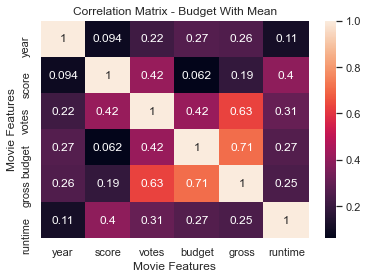

In [13]:
#heatmap with imputed values
imputed_df = df.copy()
imputed_df = imputed_df.fillna(imputed_df.mean())


sns.heatmap(imputed_df.corr(), annot= True)
plt.title("Correlation Matrix - Budget With Mean")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
#plt.savefig('Imputed_Heatmap.jpg')
plt.show()

### Of the 3 budgets, replacing null values with zero improved correlation between features
### Thus, I'll be using that matrix from here on out.

In [14]:
#Changing float64 features to int
for col in zero_df.columns:
    if zero_df[col].dtype == 'float64':
        zero_df[col] = zero_df[col].astype(int)

zero_df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124


In [15]:
#Will change all object type features to numeric
numerized_df = zero_df.copy()

for col in numerized_df.columns:
    if numerized_df[col].dtype == 'object':
        numerized_df[col] = numerized_df[col].astype('category')
        numerized_df[col] = numerized_df[col].cat.codes

numerized_df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6372,6,6,1980,1654,8,927000,2471,3851,979,52,19000000,46998772,2179,146
1,5373,6,1,1980,1445,5,65000,2169,1564,306,53,4500000,58853106,686,104
2,4956,4,0,1980,1718,8,1200000,1063,2464,1642,53,18000000,538375067,1446,124


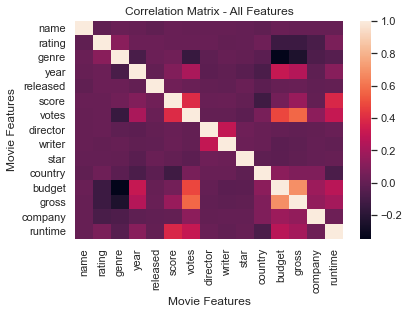

In [16]:
#New heatmap with all features
sns.heatmap(numerized_df.corr())#, annot = True)
plt.title("Correlation Matrix - All Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
#plt.savefig('All_Features_Heatmap.jpg')
plt.show()

In [ ]:
correlation_matrix = numerized_df.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending= False)

In [ ]:
sorted_pairs[sorted_pairs < 1]

budget  gross     0.687124
gross   budget    0.687124
votes   gross     0.573930
gross   votes     0.573930
votes   budget    0.486931
                    ...   
        genre    -0.145296
gross   genre    -0.229534
genre   gross    -0.229534
        budget   -0.334021
budget  genre    -0.334021
Length: 210, dtype: float64

In [ ]:
#Votes and budget have highest correlation to gross